In [12]:
import pandas as pd

df = pd.read_csv('spy_data.csv')



In [16]:
import pandas as pd

df = pd.read_csv('spy_data.csv')



# Initialize variables for performance analytics
holding = None
buy_price = None
total_profit = 0

# Iterate over each row of the DataFrame
for index, row in df.iterrows():
    if row['Moving_Average'] is not None:  # SMA available
        if holding is None and row['Close_Price'] < row['Moving_Average']:
            # Buy if price falls below SMA
            holding = row['Close_Price']
            buy_price = row['Close_Price']
            print(f"Buy at {row['Close_Price']} on {row['Date']}")
    else:
        if holding is not None:
            # Calculate daily return
            daily_return = (row['Close_Price'] - holding) / holding * 100
            print(f"Day: {row['Date']}, Close_Price: {row['Close_Price']}, Daily Return: {daily_return:.2f}%")
            if row['Close_Price'] >= buy_price * 1.05:
                # Sell to realize profit
                profit = row['Close_Price'] - buy_price
                print(f"Sell at {row['Close_Price']} on {row['Date']} to realize a profit of {profit}")
                total_profit += profit
                holding = None

# Print total profit
print(f"Total Profit/Loss: {total_profit}")

Buy at 430.2099914550781 on 2023-10-18
Total Profit/Loss: 0


In [17]:
import pandas as pd

df = pd.read_csv('spy_data.csv')

# Initialize variables for performance analytics
holding = None
buy_price = None
total_profit = 0

# Define the starting date and ending date for simulation (5 months period)
start_date = pd.to_datetime(df['Date'].iloc[0])
end_date = start_date + pd.DateOffset(months=5)

# Iterate over each row of the DataFrame within the specified period
for index, row in df.iterrows():
    current_date = pd.to_datetime(row['Date'])
    
    if current_date < end_date:
        if row['Moving_Average'] is not None:  # SMA available
            if holding is None and row['Close_Price'] < row['Moving_Average']:
                # Buy if price falls below SMA
                holding = row['Close_Price']
                buy_price = row['Close_Price']
                print(f"Buy at {row['Close_Price']} on {row['Date']}")
        else:
            if holding is not None:
                # Calculate daily return
                daily_return = (row['Close_Price'] - holding) / holding * 100
                print(f"Day: {row['Date']}, Close_Price: {row['Close_Price']}, Daily Return: {daily_return:.2f}%")
                if row['Close_Price'] >= buy_price * 1.05:
                    # Sell to realize profit
                    profit = row['Close_Price'] - buy_price
                    print(f"Sell at {row['Close_Price']} on {row['Date']} to realize a profit of {profit}")
                    total_profit += profit
                    holding = None

# Print total profit
print(f"Total Profit/Loss: {total_profit}")


Buy at 430.2099914550781 on 2023-10-18
Total Profit/Loss: 0


In [20]:
import pandas as pd

df = pd.read_csv('spy_data.csv')

# Initialize variables for performance analytics
portfolio_value = 10000  # Initial portfolio value
holding = None
buy_price = None
shares_held = 0
total_profit = 0

# Define the selling conditions

sell_above_cost = 1.05   # 3% above cost
take_profit_above_sma = 1.05  # 2% above SMA10

# Iterate over each row of the DataFrame
for index, row in df.iterrows():
    if row['Moving_Average'] is not None:  # SMA available
        if holding is None and row['Close_Price'] < row['Moving_Average']:
            # Buy if price falls below SMA
            buy_price = row['Close_Price']
            shares_held = portfolio_value // buy_price  # Buy as many shares as possible
            holding = buy_price
            portfolio_value -= shares_held * buy_price  # Update portfolio value
            print(f"Buy {shares_held} shares at {buy_price} on {row['Date']}, Portfolio Value: {portfolio_value:.2f}")
        elif holding is not None and row['Close_Price'] >= row['Moving_Average'] * take_profit_above_sma:
            # Take profit if price goes 2% above SMA10
            selling_price = row['Close_Price']
            portfolio_value += shares_held * selling_price  # Update portfolio value
            profit_loss = (selling_price - buy_price) * shares_held
            total_profit += profit_loss
            holding = None
            shares_held = 0
            print(f"Sell {shares_held} shares at {selling_price} on {row['Date']} to realize a profit of {profit_loss:.2f}, Portfolio Value: {portfolio_value:.2f}")
    else:
        if holding is not None:
            # Calculate daily return
            daily_return = (row['Close_Price'] - holding) / holding * 100
            print(f"Day: {row['Date']}, Close_Price: {row['Close_Price']}, Daily Return: {daily_return:.2f}%")
            if row['Close_Price'] >= buy_price * sell_above_cost or row['Close_Price'] <= buy_price * sell_below_cost:
                # Sell to realize profit or cut losses
                selling_price = row['Close_Price']
                portfolio_value += shares_held * selling_price  # Update portfolio value
                profit_loss = (selling_price - buy_price) * shares_held
                total_profit += profit_loss
                holding = None
                shares_held = 0
                print(f"Sell {shares_held} shares at {selling_price} on {row['Date']} to realize a profit/loss of {profit_loss:.2f}, Portfolio Value: {portfolio_value:.2f}")

# Print total profit
print(f"Total Profit/Loss: {total_profit:.2f}, Final Portfolio Value: {portfolio_value:.2f}")


Buy 23.0 shares at 430.2099914550781 on 2023-10-18, Portfolio Value: 105.17
Total Profit/Loss: 0.00, Final Portfolio Value: 105.17


In [23]:
import pandas as pd

df = pd.read_csv('spy_data.csv')

# Initialize variables for performance analytics
portfolio_value = 10000  # Initial portfolio value
holding = None
buy_price = None
shares_held = 0
total_profit = 0

# Define the selling conditions
sell_above_cost = 1.03   # 3% above cost
take_profit_above_sma = 1.02  # 2% above SMA10

# Iterate over each row of the DataFrame
for index, row in df.iterrows():
    if row['Moving_Average'] is not None:  # SMA available
        if holding is None and row['Close_Price'] < row['Moving_Average']:
            # Buy if price falls below SMA
            buy_price = row['Close_Price']
            shares_held = portfolio_value // buy_price  # Buy as many shares as possible
            holding = buy_price
            portfolio_value -= shares_held * buy_price  # Update portfolio value
            print(f"Buy {shares_held} shares at {buy_price} on {row['Date']}, Portfolio Value: {portfolio_value:.2f}")
        elif holding is not None and row['Close_Price'] >= row['Moving_Average'] * take_profit_above_sma:
            # Take profit if price goes 2% above SMA10
            selling_price = row['Close_Price']
            portfolio_value += shares_held * selling_price  # Update portfolio value
            profit_loss = (selling_price - buy_price) * shares_held
            total_profit += profit_loss
            holding = None
            shares_held = 0
            print(f"Sell {shares_held} shares at {selling_price} on {row['Date']} to realize a profit of {profit_loss:.2f}, Portfolio Value: {portfolio_value:.2f}")
    else:
        if holding is not None:
            # Calculate daily return
            daily_return = (row['Close_Price'] - holding) / holding * 100
            print(f"Day: {row['Date']}, Close_Price: {row['Close_Price']}, Daily Return: {daily_return:.2f}%")
            if row['Close_Price'] >= buy_price * sell_above_cost:
                # Sell to realize profit
                selling_price = row['Close_Price']
                portfolio_value += shares_held * selling_price  # Update portfolio value
                profit_loss = (selling_price - buy_price) * shares_held
                total_profit += profit_loss
                holding = None
                shares_held = 0
                print(f"Sell {shares_held} shares at {selling_price} on {row['Date']} to realize a profit of {profit_loss:.2f}, Portfolio Value: {portfolio_value:.2f}")

# Print total profit
print(f"Total Profit/Loss: {total_profit:.2f}, Final Portfolio Value: {portfolio_value:.2f}")


Buy 23.0 shares at 430.2099914550781 on 2023-10-18, Portfolio Value: 105.17
Sell 0 shares at 430.760009765625 on 2023-11-02 to realize a profit of 12.65, Portfolio Value: 10012.65
Buy 22.0 shares at 454.760009765625 on 2023-12-06, Portfolio Value: 7.93
Sell 0 shares at 470.5 on 2023-12-13 to realize a profit of 346.28, Portfolio Value: 10358.93
Buy 21.0 shares at 472.6499938964844 on 2024-01-02, Portfolio Value: 433.28
Total Profit/Loss: 358.93, Final Portfolio Value: 433.28


In [25]:
import pandas as pd

df = pd.read_csv('spy_data.csv')

# Initialize variables for performance analytics
portfolio_value = 10000  # Initial portfolio value
holding = None
buy_price = None
shares_held = 0
total_profit = 0
initial_portfolio_value = portfolio_value

# Define the selling conditions
sell_above_cost = 1.03   # 3% above cost
take_profit_above_sma = 1.03  # 2% above SMA10

# Lists to store cumulative returns and dates
cumulative_returns = []
dates = []

# Iterate over each row of the DataFrame
for index, row in df.iterrows():
    dates.append(row['Date'])
    if row['Moving_Average'] is not None:  # SMA available
        if holding is None and row['Close_Price'] < row['Moving_Average']:
            # Buy if price falls below SMA
            buy_price = row['Close_Price']
            shares_held = portfolio_value // buy_price  # Buy as many shares as possible
            holding = buy_price
            portfolio_value -= shares_held * buy_price  # Update portfolio value
            print(f"Buy {shares_held} shares at {buy_price} on {row['Date']}, Portfolio Value: {portfolio_value:.2f}")
        elif holding is not None and row['Close_Price'] >= row['Moving_Average'] * take_profit_above_sma:
            # Take profit if price goes 2% above SMA10
            selling_price = row['Close_Price']
            portfolio_value += shares_held * selling_price  # Update portfolio value
            profit_loss = (selling_price - buy_price) * shares_held
            total_profit += profit_loss
            holding = None
            shares_held = 0
            print(f"Sell {shares_held} shares at {selling_price} on {row['Date']} to realize a profit of {profit_loss:.2f}, Portfolio Value: {portfolio_value:.2f}")
    else:
        if holding is not None:
            # Calculate daily return
            daily_return = (row['Close_Price'] - holding) / holding * 100
            print(f"Day: {row['Date']}, Close_Price: {row['Close_Price']}, Daily Return: {daily_return:.2f}%")
            if row['Close_Price'] >= buy_price * sell_above_cost:
                # Sell to realize profit
                selling_price = row['Close_Price']
                portfolio_value += shares_held * selling_price  # Update portfolio value
                profit_loss = (selling_price - buy_price) * shares_held
                total_profit += profit_loss
                holding = None
                shares_held = 0
                print(f"Sell {shares_held} shares at {selling_price} on {row['Date']} to realize a profit of {profit_loss:.2f}, Portfolio Value: {portfolio_value:.2f}")
    cumulative_returns.append(((portfolio_value - initial_portfolio_value) / initial_portfolio_value) * 100)

# Print total profit
print(f"Total Profit/Loss: {total_profit:.2f}, Final Portfolio Value: {portfolio_value:.2f}")

# Print cumulative returns over time
for date, cumulative_return in zip(dates, cumulative_returns):
    print(f"Date: {date}, Cumulative Return: {cumulative_return:.2f}%")


Buy 23.0 shares at 430.2099914550781 on 2023-10-18, Portfolio Value: 105.17
Sell 0 shares at 434.6900024414063 on 2023-11-03 to realize a profit of 103.04, Portfolio Value: 10103.04
Buy 22.0 shares at 454.760009765625 on 2023-12-06, Portfolio Value: 98.32
Total Profit/Loss: 103.04, Final Portfolio Value: 98.32
Date: 2023-10-02, Cumulative Return: 0.00%
Date: 2023-10-03, Cumulative Return: 0.00%
Date: 2023-10-04, Cumulative Return: 0.00%
Date: 2023-10-05, Cumulative Return: 0.00%
Date: 2023-10-06, Cumulative Return: 0.00%
Date: 2023-10-09, Cumulative Return: 0.00%
Date: 2023-10-10, Cumulative Return: 0.00%
Date: 2023-10-11, Cumulative Return: 0.00%
Date: 2023-10-12, Cumulative Return: 0.00%
Date: 2023-10-13, Cumulative Return: 0.00%
Date: 2023-10-16, Cumulative Return: 0.00%
Date: 2023-10-17, Cumulative Return: 0.00%
Date: 2023-10-18, Cumulative Return: -98.95%
Date: 2023-10-19, Cumulative Return: -98.95%
Date: 2023-10-20, Cumulative Return: -98.95%
Date: 2023-10-23, Cumulative Return: 

In [26]:
import pandas as pd

df = pd.read_csv('spy_data.csv')

# Initialize variables for performance analytics and trade history
portfolio_value = 10000  # Initial portfolio value
holding = None
buy_price = None
shares_held = 0
total_profit = 0
trade_history = []

# Define the selling conditions
sell_above_cost = 1.03   # 3% above cost
take_profit_above_sma = 1.02  # 2% above SMA10

# Iterate over each row of the DataFrame
for index, row in df.iterrows():
    if row['Moving_Average'] is not None:  # SMA available
        if holding is None and row['Close_Price'] < row['Moving_Average']:
            # Buy if price falls below SMA
            buy_price = row['Close_Price']
            shares_held = portfolio_value // buy_price  # Buy as many shares as possible
            holding = buy_price
            portfolio_value -= shares_held * buy_price  # Update portfolio value
            trade_history.append((row['Date'], 'Buy', buy_price, shares_held))
            print(f"Buy {shares_held} shares at {buy_price} on {row['Date']}, Portfolio Value: {portfolio_value:.2f}")
        elif holding is not None and row['Close_Price'] >= row['Moving_Average'] * take_profit_above_sma:
            # Take profit if price goes 2% above SMA10 and trade is profitable
            selling_price = row['Close_Price']
            profit_loss = (selling_price - buy_price) * shares_held
            if profit_loss > 0:
                portfolio_value += shares_held * selling_price  # Update portfolio value
                total_profit += profit_loss
                trade_history.append((row['Date'], 'Sell', selling_price, shares_held))
                holding = None
                shares_held = 0
                print(f"Sell {shares_held} shares at {selling_price} on {row['Date']} to realize a profit of {profit_loss:.2f}, Portfolio Value: {portfolio_value:.2f}")
            else:
                print(f"Hold {shares_held} shares at {buy_price} on {row['Date']} as the trade is not profitable yet")
    else:
        if holding is not None:
            # Calculate daily return
            daily_return = (row['Close_Price'] - holding) / holding * 100
            print(f"Day: {row['Date']}, Close_Price: {row['Close_Price']}, Daily Return: {daily_return:.2f}%")
            if row['Close_Price'] >= buy_price * sell_above_cost:
                # Sell to realize profit if trade is profitable
                selling_price = row['Close_Price']
                profit_loss = (selling_price - buy_price) * shares_held
                if profit_loss > 0:
                    portfolio_value += shares_held * selling_price  # Update portfolio value
                    total_profit += profit_loss
                    trade_history.append((row['Date'], 'Sell', selling_price, shares_held))
                    holding = None
                    shares_held = 0
                    print(f"Sell {shares_held} shares at {selling_price} on {row['Date']} to realize a profit of {profit_loss:.2f}, Portfolio Value: {portfolio_value:.2f}")
                else:
                    print(f"Hold {shares_held} shares at {buy_price} on {row['Date']} as the trade is not profitable yet")

# Print total profit
print(f"Total Profit/Loss: {total_profit:.2f}, Final Portfolio Value: {portfolio_value:.2f}")

# Save trade history to a CSV file
trade_history_df = pd.DataFrame(trade_history, columns=['Date', 'Action', 'Price', 'Quantity'])
trade_history_df.to_csv('trade_history.csv', index=False)


Buy 23.0 shares at 430.2099914550781 on 2023-10-18, Portfolio Value: 105.17
Sell 0 shares at 430.760009765625 on 2023-11-02 to realize a profit of 12.65, Portfolio Value: 10012.65
Buy 22.0 shares at 454.760009765625 on 2023-12-06, Portfolio Value: 7.93
Sell 0 shares at 470.5 on 2023-12-13 to realize a profit of 346.28, Portfolio Value: 10358.93
Buy 21.0 shares at 472.6499938964844 on 2024-01-02, Portfolio Value: 433.28
Total Profit/Loss: 358.93, Final Portfolio Value: 433.28


In [27]:
import pandas as pd

df = pd.read_csv('spy_data.csv')

# Initialize variables for performance analytics and trade history
portfolio_value = 10000  # Initial portfolio value
holding = None
buy_price = None
shares_held = 0
total_profit = 0
trade_history = []

# Define the selling conditions
sell_above_cost = 1.03   # 3% above cost
take_profit_above_sma = 1.02  # 2% above SMA10

# Iterate over each row of the DataFrame
for index, row in df.iterrows():
    if row['Moving_Average'] is not None:  # SMA available
        if holding is None and row['Close_Price'] < row['Moving_Average']:
            # Buy if price falls below SMA
            buy_price = row['Close_Price']
            shares_held = portfolio_value // buy_price  # Buy as many shares as possible
            holding = buy_price
            portfolio_value -= shares_held * buy_price  # Update portfolio value
            trade_history.append((row['Date'], 'Buy', buy_price, shares_held))
            print(f"Buy {shares_held} shares at {buy_price} on {row['Date']}, Portfolio Value: {portfolio_value:.2f}")
        elif holding is not None and row['Close_Price'] >= row['Moving_Average'] * take_profit_above_sma:
            # Take profit if price goes 2% above SMA10 and trade is profitable
            selling_price = row['Close_Price']
            profit_loss = (selling_price - buy_price) * shares_held
            if profit_loss > 0:
                portfolio_value += shares_held * selling_price  # Update portfolio value
                total_profit += profit_loss
                trade_history.append((row['Date'], 'Sell', selling_price, shares_held))
                holding = None
                shares_held = 0
                print(f"Sell {shares_held} shares at {selling_price} on {row['Date']} to realize a profit of {profit_loss:.2f}, Portfolio Value: {portfolio_value:.2f}")
            else:
                print(f"Hold {shares_held} shares at {buy_price} on {row['Date']} as the trade is not profitable yet")
    else:
        if holding is not None:
            # Calculate daily return
            daily_return = (row['Close_Price'] - holding) / holding * 100
            print(f"Day: {row['Date']}, Close_Price: {row['Close_Price']}, Daily Return: {daily_return:.2f}%")
            if row['Close_Price'] >= buy_price * sell_above_cost:
                # Sell to realize profit if trade is profitable
                selling_price = row['Close_Price']
                profit_loss = (selling_price - buy_price) * shares_held
                if profit_loss > 0:
                    portfolio_value += shares_held * selling_price  # Update portfolio value
                    total_profit += profit_loss
                    trade_history.append((row['Date'], 'Sell', selling_price, shares_held))
                    holding = None
                    shares_held = 0
                    print(f"Sell {shares_held} shares at {selling_price} on {row['Date']} to realize a profit of {profit_loss:.2f}, Portfolio Value: {portfolio_value:.2f}")
                else:
                    print(f"Hold {shares_held} shares at {buy_price} on {row['Date']} as the trade is not profitable yet")

# Print total profit
print(f"Total Profit/Loss: {total_profit:.2f}, Final Portfolio Value: {portfolio_value:.2f}")

# Save trade history to a CSV file
trade_history_df = pd.DataFrame(trade_history, columns=['Date', 'Action', 'Price', 'Quantity'])
trade_history_df.to_csv('trade_history.csv', index=False)


Buy 23.0 shares at 430.2099914550781 on 2023-10-18, Portfolio Value: 105.17
Sell 0 shares at 430.760009765625 on 2023-11-02 to realize a profit of 12.65, Portfolio Value: 10012.65
Buy 22.0 shares at 454.760009765625 on 2023-12-06, Portfolio Value: 7.93
Sell 0 shares at 470.5 on 2023-12-13 to realize a profit of 346.28, Portfolio Value: 10358.93
Buy 21.0 shares at 472.6499938964844 on 2024-01-02, Portfolio Value: 433.28
Total Profit/Loss: 358.93, Final Portfolio Value: 433.28


Buy 23 shares at 430.2099914550781 on 2023-10-18, Portfolio Value: 105.17
Sell 0 shares at 448.7300109863281 on 2023-11-14 to realize a profit of 425.96, Portfolio Value: 10425.96
Buy 22 shares at 454.760009765625 on 2023-12-06, Portfolio Value: 421.24
Sell 0 shares at 470.5 on 2023-12-13 to realize a profit of 346.28, Portfolio Value: 10772.24
Buy 22 shares at 472.6499938964844 on 2024-01-02, Portfolio Value: 373.94
Sell 0 shares at 488.0299987792969 on 2024-01-25 to realize a profit of 338.36, Portfolio Value: 11110.60
Buy 23 shares at 482.8800048828125 on 2024-01-31, Portfolio Value: 4.36
Sell 0 shares at 498.1000061035156 on 2024-02-07 to realize a profit of 350.06, Portfolio Value: 11460.66
Buy 23 shares at 494.0799865722656 on 2024-02-13, Portfolio Value: 96.82
Sell 0 shares at 512.8499755859375 on 2024-03-01 to realize a profit of 431.71, Portfolio Value: 11892.37
Buy 23 shares at 507.1799926757813 on 2024-03-05, Portfolio Value: 227.23
Sell 0 shares at 523.1699829101562 on 2024

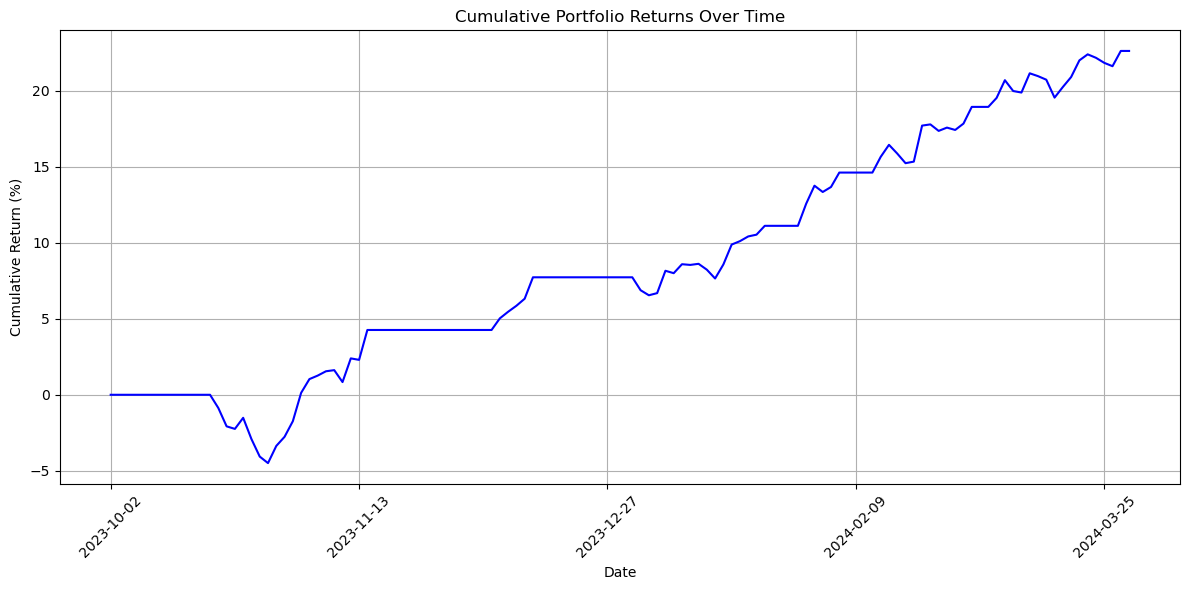

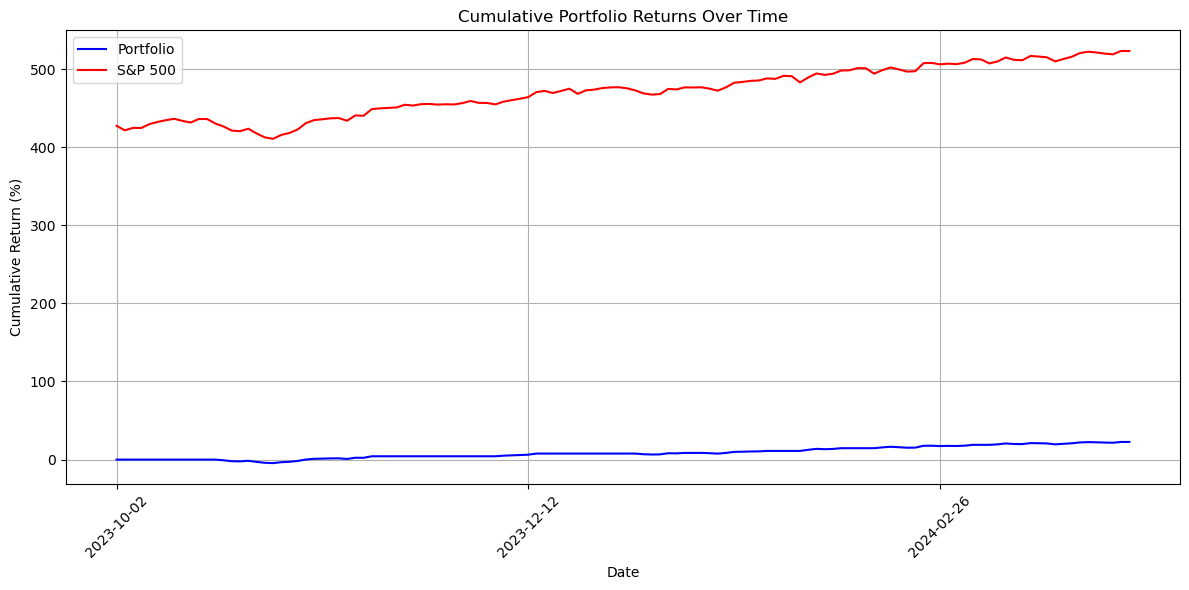

NameError: name 'cumulative_portfolio_returns' is not defined

<Figure size 1200x600 with 0 Axes>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('spy_data.csv')

# Calculate cumulative S&P 500 returns
cumulative_sp_returns = ((df['Close_Price'] - df['Close_Price'].iloc[0]) / df['Close_Price'].iloc[0]) * 100

# Initialize variables for performance analytics and trade history
portfolio_value = 10000  # Initial portfolio value
total_holdings = 0  # Total number of shares held
total_investment = 0  # Total amount invested
total_profit = 0  # Total profit
cumulative_returns = []  # List to store cumulative returns
trade_history = []  # List to store trade history

# Define the selling conditions
sell_profit_threshold = 1.03  # 3% higher than cost

# Iterate over each row of the DataFrame
for index, row in df.iterrows():
    # Update SMA available and SMA value
    sma_available = not pd.isnull(row['Moving_Average'])
    sma_value = row['Moving_Average']
    
    # Calculate total portfolio value
    total_portfolio_value = portfolio_value + total_holdings * row['Close_Price']
    
    # Update cumulative returns
    cumulative_return = ((total_portfolio_value - 10000) / 10000) * 100
    cumulative_returns.append(cumulative_return)
    
    # Buy condition: price below 10 SMA and not already holding shares
    if sma_available and row['Close_Price'] < sma_value and total_holdings == 0:
        buy_price = row['Close_Price']
        shares_to_buy = int(portfolio_value / buy_price)  # Buy as many shares as possible
        total_investment += buy_price * shares_to_buy  # Update total investment
        total_holdings += shares_to_buy  # Update total holdings
        portfolio_value -= buy_price * shares_to_buy  # Update portfolio value
        trade_history.append((row['Date'], 'Buy', buy_price, shares_to_buy))
        print(f"Buy {shares_to_buy} shares at {buy_price} on {row['Date']}, Portfolio Value: {portfolio_value:.2f}")
    
    # Sell condition: holding shares, price at least 3% higher than cost
    if total_holdings > 0 and row['Close_Price'] >= sell_profit_threshold * buy_price:
        selling_price = row['Close_Price']
        profit_loss = (selling_price - buy_price) * total_holdings
        total_profit += profit_loss  # Update total profit
        portfolio_value += selling_price * total_holdings  # Update portfolio value
        total_holdings = 0  # Reset total holdings
        trade_history.append((row['Date'], 'Sell', selling_price, total_holdings))
        print(f"Sell {total_holdings} shares at {selling_price} on {row['Date']} to realize a profit of {profit_loss:.2f}, Portfolio Value: {portfolio_value:.2f}")

# Print total profit
print(f"Total Profit/Loss: {total_profit:.2f}, Final Portfolio Value: {portfolio_value:.2f}")

# Save trade history to a CSV file
trade_history_df = pd.DataFrame(trade_history, columns=['Date', 'Action', 'Price', 'Total_Holdings'])
trade_history_df.to_csv('trade_history.csv', index=False)

# Print cumulative portfolio returns
for date, return_value in zip(df['Date'], cumulative_returns):
    print(f"Date: {date}, Cumulative Return: {return_value:.2f}%")




Total Profit/Loss: 1991.11, Final Portfolio Value: 265.02
Date: 2023-10-02, Cumulative Return: 0.00%
Date: 2023-10-03, Cumulative Return: 0.00%
Date: 2023-10-04, Cumulative Return: 0.00%
Date: 2023-10-05, Cumulative Return: 0.00%
Date: 2023-10-06, Cumulative Return: 0.00%
Date: 2023-10-09, Cumulative Return: 0.00%
Date: 2023-10-10, Cumulative Return: 0.00%
Date: 2023-10-11, Cumulative Return: 0.00%
Date: 2023-10-12, Cumulative Return: 0.00%
Date: 2023-10-13, Cumulative Return: 0.00%
Date: 2023-10-16, Cumulative Return: 0.00%
Date: 2023-10-17, Cumulative Return: 0.00%
Date: 2023-10-18, Cumulative Return: 0.00%
Date: 2023-10-19, Cumulative Return: -0.87%
Date: 2023-10-20, Cumulative Return: -2.07%
Date: 2023-10-23, Cumulative Return: -2.24%
Date: 2023-10-24, Cumulative Return: -1.51%
Date: 2023-10-25, Cumulative Return: -2.91%
Date: 2023-10-26, Cumulative Return: -4.06%
Date: 2023-10-27, Cumulative Return: -4.49%
Date: 2023-10-30, Cumulative Return: -3.36%
Date: 2023-10-31, Cumulative Re

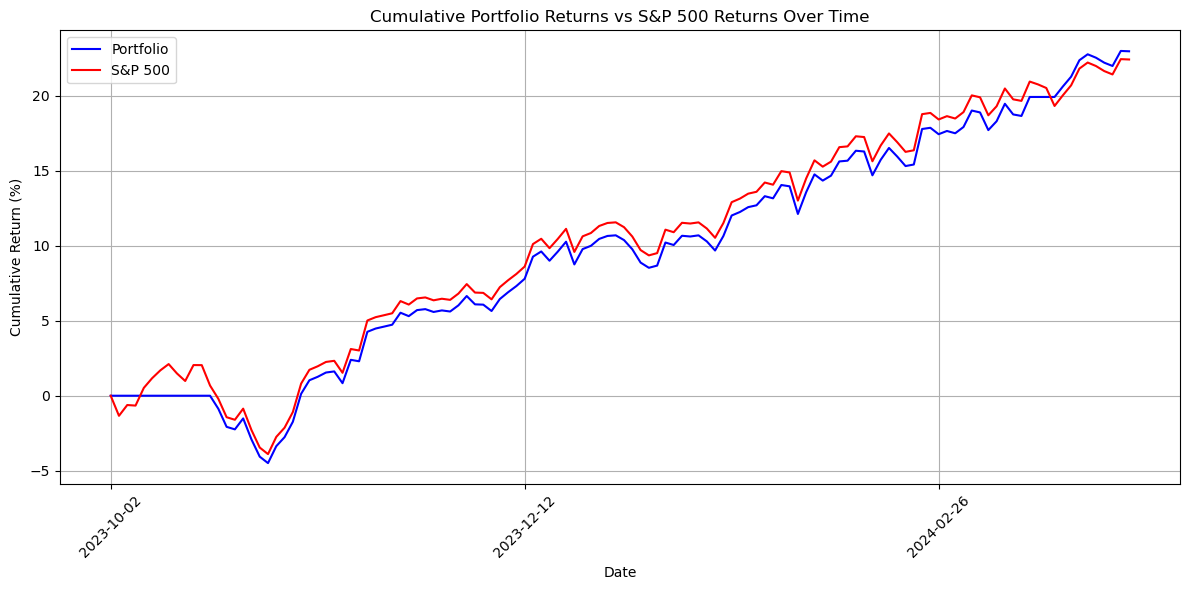

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('spy_data.csv')

# Calculate cumulative S&P 500 returns
cumulative_sp_returns = ((df['Close_Price'] - df['Close_Price'].iloc[0]) / df['Close_Price'].iloc[0]) * 100

# Initialize variables for performance analytics and trade history
portfolio_value = 10000  # Initial portfolio value
total_holdings = 0  # Total number of shares held
total_investment = 0  # Total amount invested
total_profit = 0  # Total profit
cumulative_portfolio_returns = []  # List to store cumulative portfolio returns
trade_history = []  # List to store trade history

# Define the selling conditions
sell_profit_threshold = 1.20  # 3% higher than cost

# Iterate over each row of the DataFrame
for index, row in df.iterrows():
    # Update SMA available and SMA value
    sma_available = not pd.isnull(row['Moving_Average'])
    sma_value = row['Moving_Average']
    
    # Calculate total portfolio value
    total_portfolio_value = portfolio_value + total_holdings * row['Close_Price']
    
    # Update cumulative returns
    cumulative_return = ((total_portfolio_value - 10000) / 10000) * 100
    cumulative_portfolio_returns.append(cumulative_return)
    
    # Buy condition: price below 10 SMA and not already holding shares
    if sma_available and row['Close_Price'] < sma_value and total_holdings == 0:
        buy_price = row['Close_Price']
        shares_to_buy = int(portfolio_value / buy_price)  # Buy as many shares as possible
        total_investment += buy_price * shares_to_buy  # Update total investment
        total_holdings += shares_to_buy  # Update total holdings
        portfolio_value -= buy_price * shares_to_buy  # Update portfolio value
        trade_history.append((row['Date'], 'Buy', buy_price, shares_to_buy))
    
    # Sell condition: holding shares, price at least 3% higher than cost
    if total_holdings > 0 and row['Close_Price'] >= sell_profit_threshold * buy_price:
        selling_price = row['Close_Price']
        profit_loss = (selling_price - buy_price) * total_holdings
        total_profit += profit_loss  # Update total profit
        portfolio_value += selling_price * total_holdings  # Update portfolio value
        total_holdings = 0  # Reset total holdings
        trade_history.append((row['Date'], 'Sell', selling_price, total_holdings))
        
# Print total profit
print(f"Total Profit/Loss: {total_profit:.2f}, Final Portfolio Value: {portfolio_value:.2f}")

# Save trade history to a CSV file
trade_history_df = pd.DataFrame(trade_history, columns=['Date', 'Action', 'Price', 'Total_Holdings'])
trade_history_df.to_csv('trade_history.csv', index=False)

# Print cumulative portfolio returns
for date, return_value in zip(df['Date'], cumulative_returns):
    print(f"Date: {date}, Cumulative Return: {return_value:.2f}%")



# Plot cumulative returns over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], cumulative_portfolio_returns, color='blue', label='Portfolio')
plt.plot(df['Date'], cumulative_sp_returns, color='red', label='S&P 500')
plt.title('Cumulative Portfolio Returns vs S&P 500 Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.xticks(df['Date'][::50], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
